In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_list = os.listdir('C:/Users/sumit/OneDrive/Desktop/New folder/dfs/train')
print(train_list[0:5])
print(train_list[-6:-1])

['Copy-of-anold-chiari-malformation-16e_aug_0_png_jpg.rf.e5ef5df762e26214f18a8d61c7b3ce6f.jpg', 'Copy-of-anold-chiari-malformation-16e_aug_0_png_jpg.rf.f4bf94f882bf04eba5cf2d5594109541.jpg', 'Copy-of-anold-chiari-malformation-16e_aug_1_png_jpg.rf.938d24f01d59459a936032d382003a07.jpg', 'Copy-of-anold-chiari-malformation-16e_aug_2_png_jpg.rf.996e57f2a39f661c37648cfe6b21bacc.jpg', 'Copy-of-anold-chiari-malformation-16e_aug_3_png_jpg.rf.18e1473c3d7efa5f538359296a88e096.jpg']
['Patient00739_Plane3_1_of_3_png_jpg.rf.32c0d2383eb81899e4d3446ba1197f18.jpg', 'Patient00739_Plane3_1_of_3_png_jpg.rf.f7afdc632079b992804d456849e10ad5.jpg', 'Patient00739_Plane3_2_of_3_png_jpg.rf.71185b71c3ab6aa850f4d537d8c14c46.jpg', 'Patient00739_Plane3_3_of_3_png_jpg.rf.beceab5f818fc20cda6f89a5f3030f55.jpg', 'Patient00740_Plane3_2_of_3_png_jpg.rf.dcf9461862d8710390b57cd40ab0cfc4.jpg']


In [3]:
csv_path = 'C:/Users/sumit/OneDrive/Desktop/New folder/dfs/_classes.csv'
data = pd.read_csv(csv_path)
data.head()

,filename,anold-chiari-malformation,arachnoid-cyst,cerebellah-hypoplasia,colphocephaly,encephalocele,holoprosencephaly,hydracenphaly,intracranial-hemorrdge,intracranial-tumor,m-magna,mild-ventriculomegaly,moderate-ventriculomegaly,normal,polencephaly,severe-ventriculomegaly,vein-of-galen
0,Copy-of-arachnoid-cyst-37b_aug_0_png_jpg.rf.3e...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Patient00709_Plane3_1_of_3_aug_1_png_jpg.rf.3d...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Copy-of-mild-ventriculomegaly-24a_aug_4_png_jp...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Copy-of-mild-ventriculomegaly-23c_aug_3_png_jp...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Patient00709_Plane3_2_of_3_aug_4_png_jpg.rf.3e...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [4]:
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Warning: Unable to read image at {image_path}")
        return None
    image = cv2.resize(image, (128, 128))
    image = image / 255.0  # Normalize the image
    return image

In [5]:
data.columns

Index(['filename', ' anold-chiari-malformation', ' arachnoid-cyst',
       ' cerebellah-hypoplasia', ' colphocephaly', ' encephalocele',
       ' holoprosencephaly', ' hydracenphaly', ' intracranial-hemorrdge',
       ' intracranial-tumor', ' m-magna', ' mild-ventriculomegaly',
       ' moderate-ventriculomegaly', ' normal', ' polencephaly',
       ' severe-ventriculomegaly', ' vein-of-galen'],
      dtype='object')

In [6]:
filename_col = 'filename'
label_cols = data.columns[1:]
label_cols

Index([' anold-chiari-malformation', ' arachnoid-cyst',
       ' cerebellah-hypoplasia', ' colphocephaly', ' encephalocele',
       ' holoprosencephaly', ' hydracenphaly', ' intracranial-hemorrdge',
       ' intracranial-tumor', ' m-magna', ' mild-ventriculomegaly',
       ' moderate-ventriculomegaly', ' normal', ' polencephaly',
       ' severe-ventriculomegaly', ' vein-of-galen'],
      dtype='object')

In [7]:
if ' normal' in data.columns:
    data['label'] = (data[' normal'] != 1).astype(int)
else:
    raise KeyError("The column 'normal' was not found in the CSV file. Please check the file.")

# Verify the label distribution
print("Label distribution before loading images:")
print(data['label'].value_counts())

Label distribution before loading images:
label
1    1191
0     227
Name: count, dtype: int64


In [8]:
image_dir = 'C:/Users/sumit/OneDrive/Desktop/New folder/dfs/train'

# Prepare images and labels
images = []
labels = []

for index, row in data.iterrows():
    image_path = os.path.join(image_dir, row[filename_col].strip())
    label = row['label']  # 0 for normal, 1 for abnormal
    image = load_and_preprocess_image(image_path)
    if image is not None:
        images.append(image)
        labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Debug: Print number of images and labels loaded
print(f"Loaded {len(images)} images with {len(labels)} labels.")

if len(images) == 0:
    raise ValueError("No images found. Please check the directory path and ensure there are images in the directory.")


Loaded 1418 images with 1418 labels.


In [9]:
print("Label distribution before loading images:")
print(data['label'].value_counts())

Label distribution before loading images:
label
1    1191
0     227
Name: count, dtype: int64


In [10]:
# Verify the label distribution
unique, counts = np.unique(labels, return_counts=True)
print(f"Label distribution: {dict(zip(unique, counts))}")

Label distribution: {0: 227, 1: 1191}


In [11]:
images[:5]

array([[[0.14117647, 0.14117647, 0.13333333, ..., 0.12941176,
         0.1254902 , 0.1254902 ],
        [0.14117647, 0.14117647, 0.13333333, ..., 0.12941176,
         0.1254902 , 0.1254902 ],
        [0.14117647, 0.14117647, 0.1372549 , ..., 0.12941176,
         0.12941176, 0.12941176],
        ...,
        [0.14901961, 0.14901961, 0.14901961, ..., 0.13333333,
         0.12941176, 0.12941176],
        [0.14901961, 0.14901961, 0.14901961, ..., 0.13333333,
         0.13333333, 0.13333333],
        [0.14901961, 0.14901961, 0.14901961, ..., 0.13333333,
         0.13333333, 0.13333333]],

       [[0.00784314, 0.00784314, 0.00784314, ..., 0.00784314,
         0.00784314, 0.00784314],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.01176471, 0.01176471, 0.01176471, ..., 0.01176471,
         0.01176471, 0.01176471],
        [0.0

In [12]:
labels[:5]

array([1, 0, 1, 1, 0])

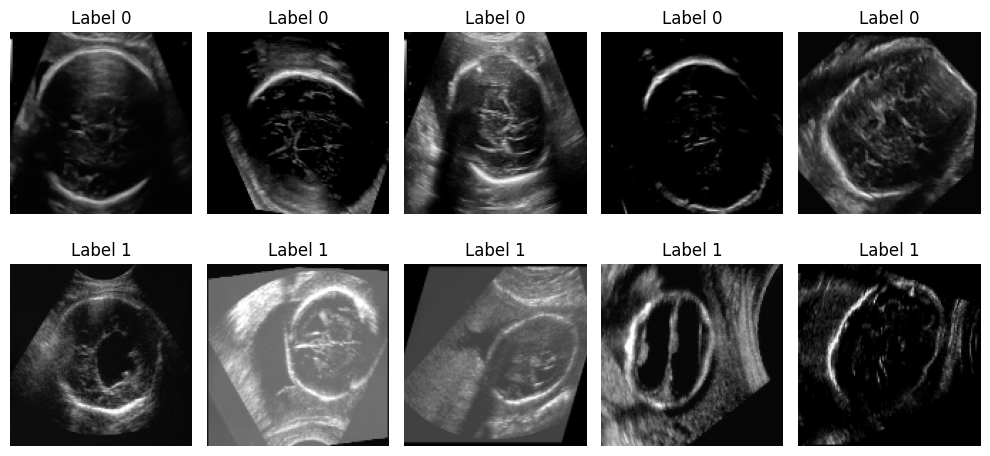

In [13]:
# Plot a few images for each class
label_images = {0: [], 1: []}
for image, label in zip(images, labels):
    if len(label_images[label]) < 5:
        label_images[label].append(image)

plt.figure(figsize=(10, 5))
for i, (label, imgs) in enumerate(label_images.items()):
    for j, img in enumerate(imgs):
        plt.subplot(2, 5, i * 5 + j + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Label {label}')
        plt.axis('off')
plt.tight_layout()
plt.show()

In [14]:
# Expand dimensions of images to match the input shape for the model (assuming grayscale images)
images = np.expand_dims(images, axis=-1)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data augmentation with moderate parameters
train_datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator()  # No augmentation for validation data

# Create data generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

# Define a simpler CNN model with moderate complexity
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 output classes for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model with early stopping based on validation loss
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    validation_data=val_generator,
    validation_steps=len(X_val) // 32,
    epochs=20,
    callbacks=[early_stopping]
)


C:\Users\sumit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,002 (28.20 MB)

 Trainable params: 7,392,002 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


C:\Users\sumit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 278ms/step - accuracy: 0.8444 - loss: 0.6700 - val_accuracy: 0.8359 - val_loss: 0.3884
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8125 - loss: 0.4155 - val_accuracy: 0.7857 - val_loss: 0.5562
Epoch 3/20


C:\Users\sumit\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 276ms/step - accuracy: 0.8599 - loss: 0.3583 - val_accuracy: 0.8555 - val_loss: 0.3650
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8438 - loss: 0.2167 - val_accuracy: 0.9286 - val_loss: 0.1890
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 271ms/step - accuracy: 0.8847 - loss: 0.3034 - val_accuracy: 0.8594 - val_loss: 0.3358
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8438 - loss: 0.2640 - val_accuracy: 0.8929 - val_loss: 0.2203
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 250ms/step - accuracy: 0.8884 - loss: 0.2917 - val_accuracy: 0.8984 - val_loss: 0.2998


In [15]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_generator)

print(f'Validation Accuracy: {val_accuracy:.2f}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8638 - loss: 0.3862
Validation Accuracy: 0.87


In [17]:
# Load validation data
valid_csv_path = 'C:/Users/sumit/OneDrive/Desktop/New folder/dfs/valid/_classes.csv'
valid_data = pd.read_csv(valid_csv_path)

# Assuming the ' normal' column indicates if an image is normal (1 = normal, 0 = abnormal)
if ' normal' in valid_data.columns:
    valid_data['label'] = (valid_data[' normal'] != 1).astype(int)
else:
    raise KeyError("The column 'normal' was not found in the validation CSV file. Please check the file.")


# Prepare validation images and labels
valid_images = []
valid_labels = []

for index, row in valid_data.iterrows():
    image_path = os.path.join('C:/Users/sumit/OneDrive/Desktop/New folder/dfs/valid', row['filename'].strip())
    label = row['label']  # 0 for normal, 1 for abnormal
    image = load_and_preprocess_image(image_path)
    if image is not None:
        valid_images.append(image)
        valid_labels.append(label)

# Convert to numpy arrays
valid_images = np.array(valid_images)
valid_labels = np.array(valid_labels)

# Expand dimensions for validation images (grayscale)
valid_images = np.expand_dims(valid_images, axis=-1)


In [18]:
# Create validation data generator
valid_datagen = ImageDataGenerator()

# Load validation data into generator
valid_generator = valid_datagen.flow(valid_images, valid_labels, batch_size=32)


In [19]:
# Re-train the model with validation data
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    validation_data=valid_generator,
    validation_steps=len(valid_images) // 32,
    epochs=20,
    callbacks=[early_stopping]
)

# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(valid_generator)
print(f'Validation Accuracy: {val_accuracy:.2f}')


Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.8820 - loss: 0.3079

C:\Users\sumit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 258ms/step - accuracy: 0.8817 - loss: 0.3080 - val_accuracy: 0.9312 - val_loss: 0.2650
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8750 - loss: 0.2469 - val_accuracy: 1.0000 - val_loss: 0.0774
Epoch 3/20


C:\Users\sumit\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 264ms/step - accuracy: 0.8948 - loss: 0.2560 - val_accuracy: 0.9375 - val_loss: 0.2630
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.1360 - val_accuracy: 1.0000 - val_loss: 0.1177
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 269ms/step - accuracy: 0.8716 - loss: 0.2887 - val_accuracy: 0.9438 - val_loss: 0.2236
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9590 - loss: 0.2212
Validation Accuracy: 0.94


In [20]:
# Load the test dataset
test_csv_path = 'C:/Users/sumit/OneDrive/Desktop/New folder/dfs/test/_classes.csv'
test_data = pd.read_csv(test_csv_path)

# Prepare test images (no labels since this is unseen data)
test_images = []

for index, row in test_data.iterrows():
    image_path = os.path.join('C:/Users/sumit/OneDrive/Desktop/New folder/dfs/test', row['filename'].strip())
    image = load_and_preprocess_image(image_path)
    if image is not None:
        test_images.append(image)

# Convert test images to numpy array
test_images = np.array(test_images)

# Expand dimensions for grayscale images
test_images = np.expand_dims(test_images, axis=-1)

print(f"Loaded {len(test_images)} test images.")


Loaded 176 test images.


In [21]:
# Predict using the trained model
predictions = model.predict(test_images)

# Since it's binary classification (normal/abnormal), use argmax to find the predicted class (0 or 1)
predicted_labels = np.argmax(predictions, axis=1)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [22]:
# Add predictions to the test dataframe
test_data['predicted_label'] = predicted_labels

# Map 0 to 'normal' and 1 to 'abnormal'
test_data['predicted_label'] = test_data['predicted_label'].map({0: 'normal', 1: 'abnormal'})

# Save the results to a new CSV file
output_csv_path = 'C:/Users/sumit/OneDrive/Desktop/New folder/dfs/test_predictions.csv'
test_data[['filename', 'predicted_label']].to_csv(output_csv_path, index=False)

print(f"Predictions saved to {output_csv_path}")


Predictions saved to C:/Users/sumit/OneDrive/Desktop/New folder/dfs/test_predictions.csv
